# Implement the OvA model for classification

- Your Name:
- Your ID:

In [41]:
import numpy as np
from matplotlib import pyplot as plt

In [42]:
def sigmoid(z):
    return 1/(1+np.exp(-z)) 

def LogisticOVAModel(w, x):
    ##### Your code here #####
    ##### rewrite the following line to calculate a
    a = np.random.rand(w.shape[0], x.shape[1])
    ##### Your code end #####
    return a

def cost(a, y):
    ##### Your code here #####
    # rewrite the following line to calculate J
    J = 0.5
    ##### Your code end #####
    return J

def grad(a, x, y):
    ##### Your code here #####
    # rewrite the following line to calculate gw
    gw = np.random.rand(a.shape[0], x.shape[0])
    ##### Your code end #####
    return gw

In [43]:
def accuarcy(pred, label):
    pred_idx = np.argmax(pred, axis=0)
    label_idx = np.argmax(label, axis=0)
    return np.mean(pred_idx==label_idx)*100
        
def grad_decent(model, w, train_x, train_y, test_x, test_y, alpha=0.01, max_iters=1000, display_period=50):
    train_costs = []
    train_accs = []
    test_costs = []
    test_accs = []
    
    for k in range(max_iters):
        #train
        train_a = model(w, train_x)
        grad_w = grad(train_a, train_x, train_y)
        w = w - alpha* grad_w
        
        if k % display_period == 0:
            train_cost = cost(train_a, train_y)
            train_costs.append(train_cost)
            train_acc = accuarcy(train_a, train_y)
            train_accs.append(train_acc)

            test_a = model(w, test_x)
            test_cost = cost(test_a, test_y)
            test_costs.append(test_cost)
            test_acc = accuarcy(test_a, test_y)
            test_accs.append(test_acc)
            
            print("iter={:4d} train_cost={:.4f}, train_acc=[{:.2f}] test_cost={:.4f}, test_acc=[{:.2f}]".format(k, train_cost,train_acc,test_cost,test_acc))
    
    ### plot figures
    plt.figure()
    plt.plot([i*display_period for i in range(len(train_costs))], train_costs, 'r-', label="train_costs")
    plt.plot([i*display_period for i in range(len(test_costs))], test_costs, 'b-', label="test_costs")
    plt.legend()
    plt.figure()
    plt.plot([i*display_period for i in range(len(train_accs))], train_accs, 'r-^', label="train_accs")
    plt.plot([i*display_period for i in range(len(test_accs))], test_accs, 'b-^', label="test_accs")
    plt.legend()
    
    train_a = model(w, train_x)
    train_acc = accuarcy(train_a, train_y)
    test_a = model(w, test_x)
    test_acc = accuarcy(test_a, test_y)
    
    
    return train_acc, test_acc        

Text(0.5, 1.0, 'test data')

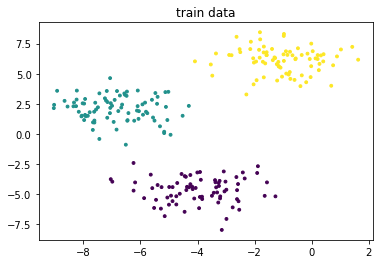

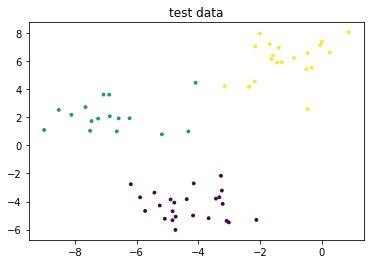

In [44]:
x_train = np.load("x_train.npy")
y_train = np.load("y_train.npy")
x_test = np.load("x_test.npy")
y_test = np.load("y_test.npy")

plt.figure()
plt.scatter(x_train[0,:],x_train[1,:],c=y_train,s=8)
plt.title("train data")
plt.figure()
plt.scatter(x_test[0,:],x_test[1,:],c=y_test,s=8)
plt.title("test data")

In [45]:
def idx2oneHot(y,num_class):
    onehot = (np.arange(num_class) == y[:, None]).astype(np.float32)
    return onehot.transpose()

In [46]:
num_class = 3

train_x = np.concatenate([x_train, np.ones((1, x_train.shape[1]))])
print("new shape of train x:{}".format(train_x.shape))

test_x = np.concatenate([x_test, np.ones((1, x_test.shape[1]))])
print("new shape of test x:{}".format(test_x.shape))

train_y = idx2oneHot(y_train, num_class)
test_y = idx2oneHot(y_test, num_class)
print("new shape of train y:{}".format(train_y.shape))
print("new shape of test y:{}".format(test_y.shape))

new shape of train x:(3, 240)
new shape of test x:(3, 60)
new shape of train y:(3, 240)
new shape of test y:(3, 60)


iter=   0 train_cost=0.5000, train_acc=[37.08] test_cost=0.5000, test_acc=[33.33]
iter=  50 train_cost=0.5000, train_acc=[32.50] test_cost=0.5000, test_acc=[31.67]
iter= 100 train_cost=0.5000, train_acc=[33.33] test_cost=0.5000, test_acc=[33.33]
iter= 150 train_cost=0.5000, train_acc=[30.00] test_cost=0.5000, test_acc=[26.67]
iter= 200 train_cost=0.5000, train_acc=[31.67] test_cost=0.5000, test_acc=[36.67]
iter= 250 train_cost=0.5000, train_acc=[32.92] test_cost=0.5000, test_acc=[31.67]
iter= 300 train_cost=0.5000, train_acc=[34.58] test_cost=0.5000, test_acc=[35.00]
iter= 350 train_cost=0.5000, train_acc=[28.33] test_cost=0.5000, test_acc=[45.00]
iter= 400 train_cost=0.5000, train_acc=[28.75] test_cost=0.5000, test_acc=[31.67]
iter= 450 train_cost=0.5000, train_acc=[30.00] test_cost=0.5000, test_acc=[38.33]
iter= 500 train_cost=0.5000, train_acc=[31.67] test_cost=0.5000, test_acc=[31.67]
iter= 550 train_cost=0.5000, train_acc=[36.25] test_cost=0.5000, test_acc=[33.33]
iter= 600 train_

(35.41666666666667, 35.0)

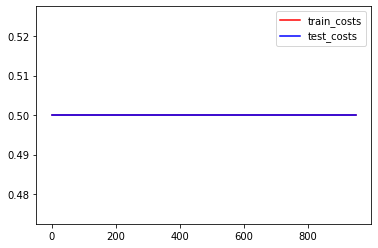

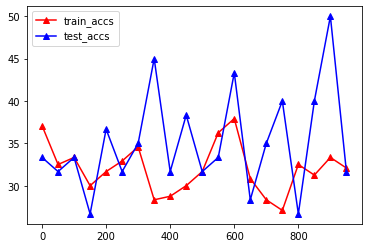

In [47]:
w = np.random.rand(train_x.shape[0], train_y.shape[0])
grad_decent(LogisticOVAModel, w, train_x, train_y, test_x, test_y, alpha=0.01, max_iters=1000, display_period=50)